<a href="https://colab.research.google.com/github/PVNgopal07/Machine-Learning/blob/main/EDA(assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pokemon.csv

The datset provided is fictional
the dataset consists of 721 records and 13 columns
the dataset gives the information about diifferent types of pokemons that are existed in the world


In [ ]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.shape

(801, 13)

In [100]:
pokemon.head()

,S_No,Name,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False


In [ ]:
pokemon.Type1.unique()  #It gives the unique values in the column

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', nan, 'Rock', 'Ghost',
       'Ice', 'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
pokemon.Type2.unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [76]:
# Checking for inconsistencies in data types
print(pokemon.dtypes)

Name           object
Type1          object
Total         float64
HP            float64
Attack        float64
Defense       float64
Sp. Atk       float64
Sp. Def       float64
Speed         float64
Generation    float64
Legendary      object
dtype: object


Now I checked for inconsistencies in the data types and there is no inconsistency between them



In [ ]:
m = pokemon["Type1"].value_counts()
n = pokemon["Type2"].value_counts()
print("Type1 :\n",m)
print("Type2 :\n",n)

Type1 :
 Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     26
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64
Type2 :
 Type2
Flying      96
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64


Now I have checked for no.of  pokemons are existed in the dataset of same type and there are 18 various types
Shows frequency of each Type1 and Type2 Pokémon within the pokemon dataset.

In [ ]:
#Checking the null values in the dataset
pokemon.isnull().sum()

,0
Name,1
Type1,2
Type2,388
Total,1
HP,1
Attack,1
Defense,1
Sp. Atk,1
Sp. Def,1
Speed,1


I have checked for null values as column-wise and in the Type2 column there are max of 388  null values are there in the dataset

Identified which columns in the dataset have missing data and how many missing values are present. This information is crucial for data cleaning and preprocessing.

#Seaborn:
It is a python library used to statistically visualize data. Seaborn, built over Matplotlib, provides a better interface and ease of usage.

In [101]:
p1 = pd.DataFrame(pokemon)  # Converting the given data innto DataFrame

<ipython-input-33-8222bc670a8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type1', data=p1, palette="Set2")


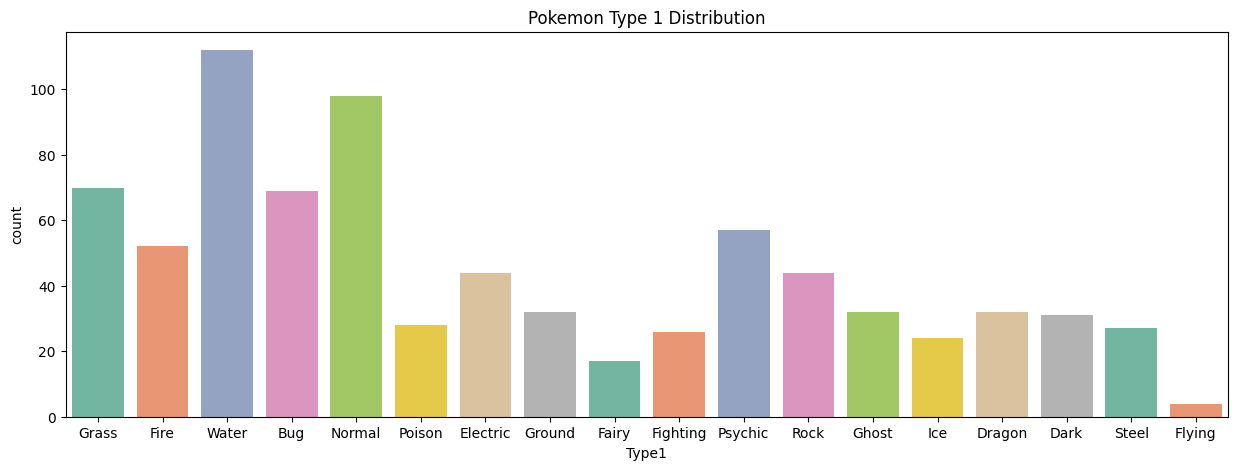

<ipython-input-33-8222bc670a8c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type2', data=p1, palette="Set2")


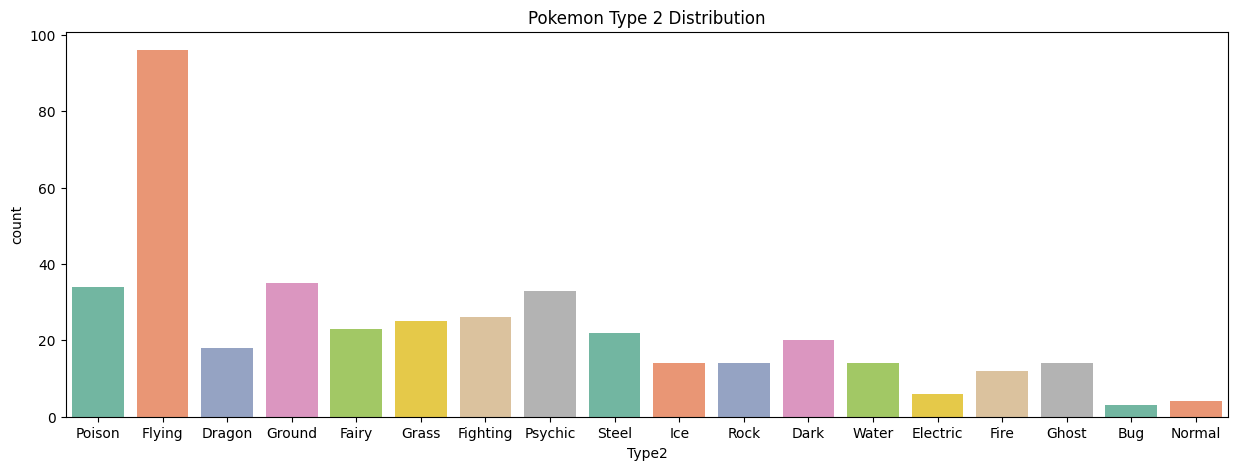

In [33]:
#Plotting the bar plot for Type1
plt.figure(figsize=(15,5))
sns.countplot(x='Type1', data=p1, palette="Set2")
plt.title("Pokemon Type 1 Distribution")
plt.show()

#Plotting the bar plot for Type2
plt.figure(figsize=(15,5))
sns.countplot(x='Type2', data=p1, palette="Set2")
plt.title("Pokemon Type 2 Distribution")
plt.show()

Created two bar plots. The first plot visualizes the distribution of primary types (Type1) in the Pokemon dataset, while the second plot visualizes the distribution of secondary types (Type2).
Both plots utilize the seaborn library for plotting and the 'Set2' color palette for visual styling.

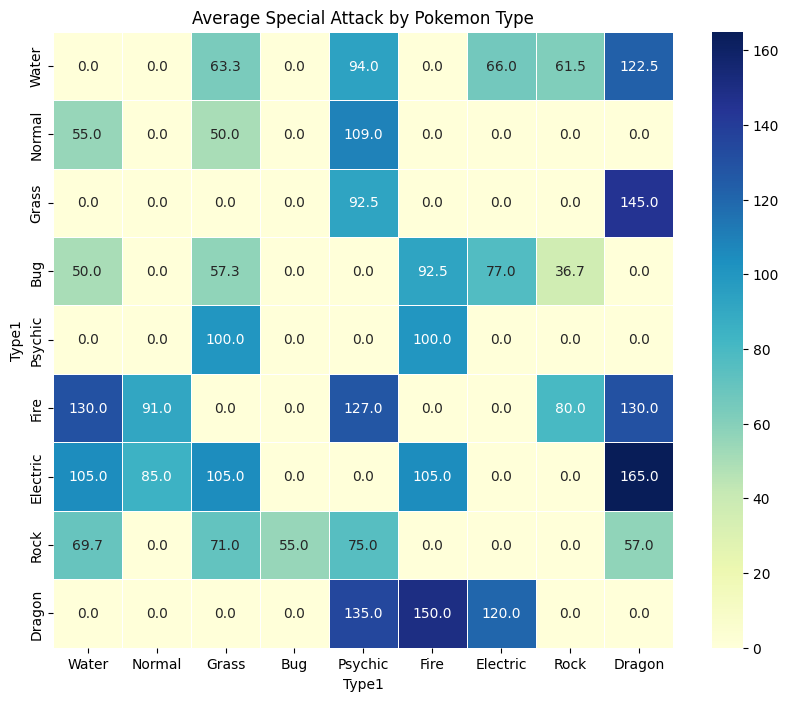

In [80]:
top_9_types = pokemon['Type1'].value_counts().nlargest(9).index

pokemon_filtered = pokemon[pokemon['Type1'].isin(top_9_types)]

heatmap_data = pokemon_filtered.pivot_table(index='Type1', columns='Type2', values='Sp. Atk', aggfunc='mean')

heatmap_data = heatmap_data.fillna(0)

heatmap_data = heatmap_data.loc[top_9_types, top_9_types]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Special Attack by Pokemon Type')
plt.show()

 Created a heatmap that allows you to visualize the average special attack across different Pokemon types and their secondary types **within** the top 9 most frequent types in your data.

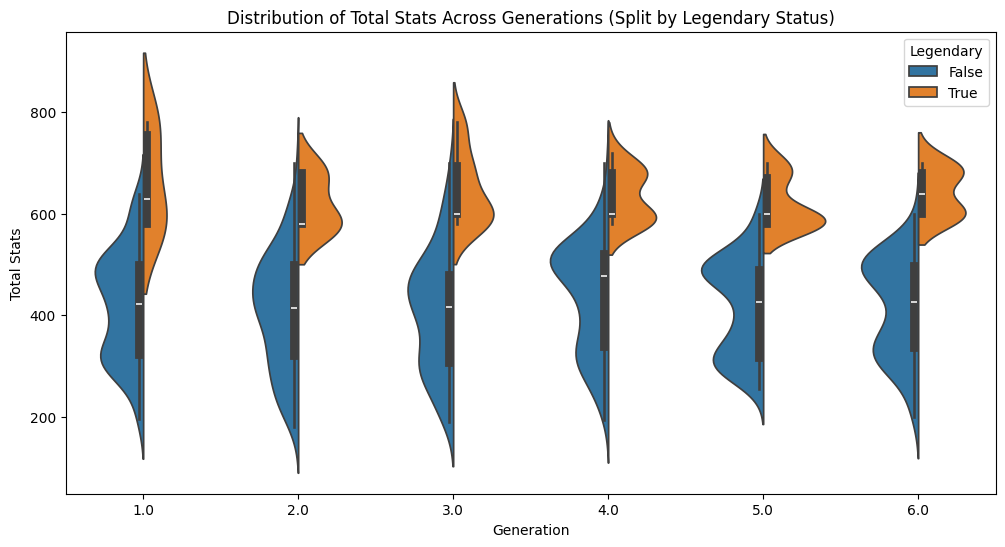

In [102]:
# Create the violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Generation', y='Total', hue='Legendary', data=pokemon, split=True,)
plt.title('Distribution of Total Stats Across Generations (Split by Legendary Status)')
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.show()

Utilized the Pokemon dataset to create a violin plot that illustrates the distribution of total stats across different generations, distinguishing between legendary and non-legendary Pokemon.

In [103]:
pokemon = pd.read_csv('Pokemon.csv')

pokemon.columns

Index(['S_No', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

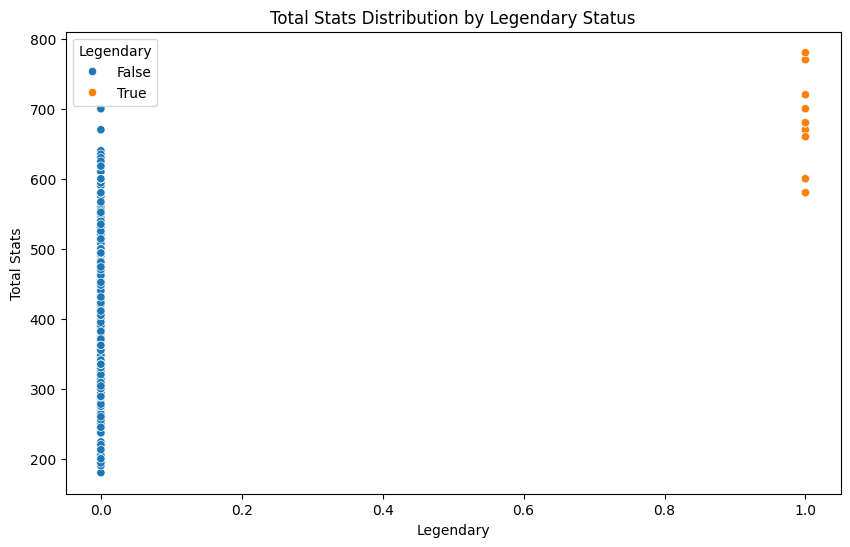

In [92]:
# Create the factorplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Legendary', y='Total', data=pokemon, hue='Legendary')
plt.title('Total Stats Distribution by Legendary Status')
plt.xlabel('Legendary')
plt.ylabel('Total Stats')
plt.show()

Created a scatter plot that illustrates the distribution of total stats across different generations, distinguishing between legendary and non-legendary Pokemon.

<Figure size 1000x800 with 0 Axes>

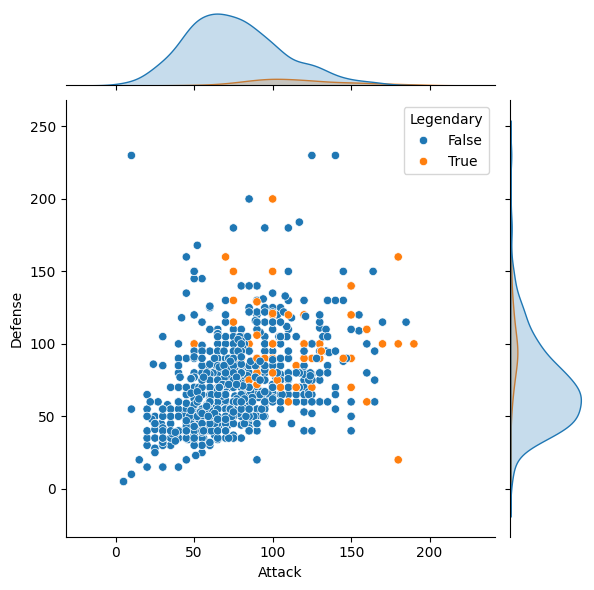

In [96]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=pokemon, x='Attack', y='Defense', hue='Legendary')
plt.show()

The above grapph is a joinplot created using the seaborn library.
The stat shows relation between Attack and Defence attributes.

In [110]:
pokemon = pd.read_csv('Pokemon.csv')

# Deleted the 'Type2' column
pokemon = pokemon.drop('Type2', axis=1)

print(pokemon.head())

  S_No                   Name  Type1  Total    HP  Attack  Defense  Sp. Atk  \
0    1              Bulbasaur  Grass  318.0  45.0    49.0     49.0     65.0   
1    2                Ivysaur  Grass  405.0  60.0    62.0     63.0     80.0   
2    3               Venusaur  Grass  525.0  80.0    82.0     83.0    100.0   
3    3  VenusaurMega Venusaur  Grass  625.0  80.0   100.0    123.0    122.0   
4    4             Charmander   Fire  309.0  39.0    52.0     43.0     60.0   

   Sp. Def  Speed  Generation Legendary  
0     65.0   45.0         1.0     False  
1     80.0   60.0         1.0     False  
2    100.0   80.0         1.0     False  
3    120.0   80.0         1.0     False  
4     50.0   65.0         1.0     False  


As per my observations there is no need of Type2 attribute in the dataset.
It creates anamolies between Type1 and Type2 columns.
So, I have removed the Type2 attribute from the dataset.